## SVM Checker

In [44]:
%matplotlib inline

import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import itertools




def example(num_samples=10, num_features=2, grid_size=20, kernelType = 'linear'):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = {
        'linear': svm.SVMTrainer(svm.Kernel.linear()),
        'gaussian': svm.SVMTrainer(svm.Kernel.gaussian(1.0)),
        'polynomial': svm.SVMTrainer(svm.Kernel.polynomial(1.0))
    }[kernelType]
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
    Z = np.array(result).reshape(xx.shape)
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ -6.16185370e-01   9.77312239e-01]
 [  8.37360051e-01  -1.83520557e+00]
 [ -6.56314771e-01  -1.34844244e+00]
 [ -8.32911031e-03   1.64325398e+00]
 [  2.23156684e+00   1.27561203e+00]
 [ -8.56133850e-04   1.39327698e+00]
 [ -1.29550094e+00  -2.51847781e-02]
 [  1.99669489e-01   3.61567934e-01]
 [ -7.06236900e-02  -7.94421759e-01]
 [  1.22615161e+00   6.99091713e-01]]
     pcost       dcost       gap    pres   dres
 0: -1.8868e+00 -3.9031e+00  2e+01  4e+00  2e+00
 1: -2.4343e+00 -3.4194e+00  6e+00  1e+00  4e-01
 2: -1.2457e+00 -1.9045e+00  7e-01  5e-16  2e-15
 3: -1.5124e+00 -1.6094e+00  1e-01  2e-16  5e-16
 4: -1.5843e+00 -1.5889e+00  5e-03  4e-16  6e-16
 5: -1.5867e+00 -1.5867e+00  5e-05  5e-16  5e-16
 6: -1.5867e+00 -1.5867e+00  5e-07  5e-16  5e-16
Optimal solution found.
[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
   1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.
   1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

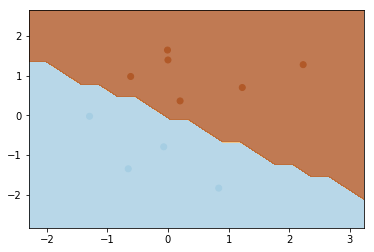

In [45]:
example()

SyntaxError: invalid syntax (<ipython-input-11-64bace187c5e>, line 1)

  Using cached cvxopt-1.1.9.tar.gz
  Running setup.py bdist_wheel for cvxopt: started
  Running setup.py bdist_wheel for cvxopt: finished with status 'error'
  Complete output from command C:\Users\opolishchuk\Anaconda31\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\OPOLIS~1\\AppData\\Local\\Temp\\pip-build-1bc5p36c\\cvxopt\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\OPOLIS~1\AppData\Local\Temp\tmp65ykhvonpip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\cvxopt
  copying src\python\coneprog.py -> build\lib.win-amd64-3.6\cvxopt
  copying src\python\cvxprog.py -> build\lib.win-amd64-3.6\cvxopt
  copying src\python\info.py -> build\lib.win-amd64-3.6\cvxopt
  copying src\python\misc.py -> build\lib.win-amd64-3.6\cvxopt
  copying 

  Failed building wheel for cvxopt
Command "C:\Users\opolishchuk\Anaconda31\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\OPOLIS~1\\AppData\\Local\\Temp\\pip-build-1bc5p36c\\cvxopt\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\OPOLIS~1\AppData\Local\Temp\pip-pj6ri_lz-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\OPOLIS~1\AppData\Local\Temp\pip-build-1bc5p36c\cvxopt\


Invalid requirement: ''numpy\u20111.13.3+mkl\u2011cp36\u2011cp36m\u2011win_amd64.whl''
Traceback (most recent call last):
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\packaging\requirements.py", line 90, in __init__
    req = REQUIREMENT.parseString(requirement_string)
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pyparsing.py", line 1632, in parseString
    raise exc
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pyparsing.py", line 1622, in parseString
    loc, tokens = self._parse( instring, 0 )
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instring, preloc, doActions )
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pyparsing.py", line 3395, in parseImpl
    loc, exprtokens = e._parse( instring, loc, doActions )
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pyparsing.py", line 1379, in _parseNoCache
    loc,tokens = self.parseImpl( instri

3.4.5 |Continuum Analytics, Inc.| (default, Jul  5 2016, 14:53:07) [MSC v.1600 64 bit (AMD64)]


Processing c:\users\opolishchuk\cvxopt-1.1.9-cp36-cp36m-win_amd64.whl


Requirement 'cvxopt-1.1.9-cp36-cp36m-win_amd64.whl' looks like a filename, but the file does not exist
Exception:
Traceback (most recent call last):
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\basecommand.py", line 215, in main
    status = self.run(options, args)
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\commands\install.py", line 335, in run
    wb.build(autobuilding=True)
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\req\req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\req\req_set.py", line 620, in _prepare_file
    session=self.session, hashes=hashes)
  File "C:\Users\opolishchuk\Anaconda31\lib\site-packages\pip\download.py", line 809, in unpack_url
    unpack_file_url(link, location, 